# Latar Belakang
Sebagai sistem transportasi publik terbesar di Jakarta, TransJakarta setiap harinya menghasilkan sejumlah besar data perjalanan yang merefleksikan pola mobilitas warga ibu kota. Data ini menyimpan potensi besar untuk diolah menjadi wawasan strategis guna meningkatkan kualitas layanan. Dengan menganalisis data transaksi pengguna secara mendalam, kita dapat mengungkap karakteristik unik dari berbagai kelompok pengguna, mulai dari komuter harian hingga pengguna insidental.

Pemahaman menyeluruh terhadap pola perjalanan ini memungkinkan manajemen TransJakarta untuk mengoptimalkan alokasi armada, menyesuaikan frekuensi bus sesuai fluktuasi permintaan, serta merancang intervensi yang tepat sasaran guna meningkatkan kepuasan penumpang. Lebih jauh lagi, analisis ini dapat menjadi dasar yang kuat dalam perencanaan rute-rute baru maupun penyempurnaan rute eksisting, memastikan layanan yang lebih efisien dan responsif terhadap kebutuhan masyarakat.

Melalui pendekatan berbasis data ini, TransJakarta dapat bertransformasi dari sekadar penyedia transportasi menjadi sistem mobilitas cerdas yang benar-benar memahami dan melayani kebutuhan warganya. Analisis yang komprehensif terhadap data historis perjalanan tidak hanya bermanfaat untuk perbaikan operasional jangka pendek, tetapi juga menjadi landasan dalam merancang strategi pengembangan jangka panjang yang berkelanjutan.

## Pernyataan Masalah
Pemerintah Provinsi DKI Jakarta dan pengelola Transjakarta ingin memahami perilaku dan pola perjalanan penumpang mereka berdasarkan data transaksi digital yang telah terekam. Informasi ini penting untuk membantu perencanaan kapasitas armada, efisiensi rute, serta peningkatan pelayanan.

Sebagai seorang data analyst, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana karakteristik penumpang Transjakarta berdasarkan data perjalanan mereka, terutama dalam hal rute yang digunakan, waktu tempuh, dan segmentasi pengguna?**

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait transaksi perjalanan penumpang TransJakarta, termasuk informasi kartu yang digunakan, asal dan tujuan perjalanan, waktu naik dan turun, serta jumlah pembayaran. Data ini sangat cocok untuk menganalisis pola mobilitas, demografi penumpang, serta performa rute dan halte.

* transID: ID transaksi unik untuk setiap perjalanan.
* payCardID: ID kartu pelanggan. Kartu ini digunakan sebagai tiket masuk dan keluar.
* payCardBank: Nama bank penerbit kartu pelanggan.
* payCardName: Nama pelanggan yang tercantum di kartu.
* payCardSex: Jenis kelamin pelanggan yang tercantum di kartu.
* payCardBirthDate: Tahun lahir pelanggan.
* corridorID: ID koridor atau rute, digunakan sebagai kunci pengelompokan rute.
* corridorName: Nama koridor atau rute, berisi nama titik awal dan akhir rute.
* direction: Arah perjalanan; 0 untuk berangkat, 1 untuk kembali.
* tapInStops: ID halte saat penumpang naik (tap in), digunakan untuk mengidentifikasi nama halte.
* tapInStopsName: Nama halte tempat penumpang naik.
* tapInStopsLat: Koordinat lintang (latitude) halte tempat naik.
* tapInStopsLon: Koordinat bujur (longitude) halte tempat naik.
* stopStartSeq: Urutan halte berdasarkan arah perjalanan (halte ke-1, ke-2, dst).
* tapInTime: Waktu saat penumpang melakukan tap in (naik), mencakup tanggal dan jam.
* tapOutStops: ID halte saat penumpang turun (tap out), digunakan untuk mengidentifikasi nama halte.
* tapOutStopsName: Nama halte tempat penumpang turun.
* tapOutStopsLat: Koordinat lintang halte tempat turun.
* tapOutStopsLon: Koordinat bujur halte tempat turun.
* stopEndSeq: Urutan halte tujuan berdasarkan arah perjalanan.
* tapOutTime: Waktu saat penumpang melakukan tap out (turun), mencakup tanggal dan jam.
* payAmount: Jumlah yang dibayarkan oleh penumpang. Ada yang gratis, ada juga yang berbayar.

Berikut 5 baris teratas dan terbawah dari dataset Transjakarta.

In [2]:
df=pd.read_csv('Transjakarta.csv')
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,...,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset Transjakarta.

In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [4]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [5]:
pd.set_option('display.max_colwidth', 1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

Secara umum, kita bisa melihat bahwa:
* dataset hr_analytics memiliki 21 kolom dan 37.900 baris
* beberapa kolom, yaitu, `corridorID  `, `corridorName`, `tapInStops`, `tapOutStops`,	`tapOutStopsName`,	`tapOutStopsLat`,	`tapOutStopsLon`,	`stopEndSeq`,	`tapOutTime`,	`payAmount`memiliki data kosong. Data kosong pada kolom-kolom tersebut diwakili dengan data NaN.
* kolom `transID` berisikan id unik untuk tiap pengguna, sehingga tidak relevan dalam analisis dan bisa dihapus saja.

### Missing Value

In [6]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

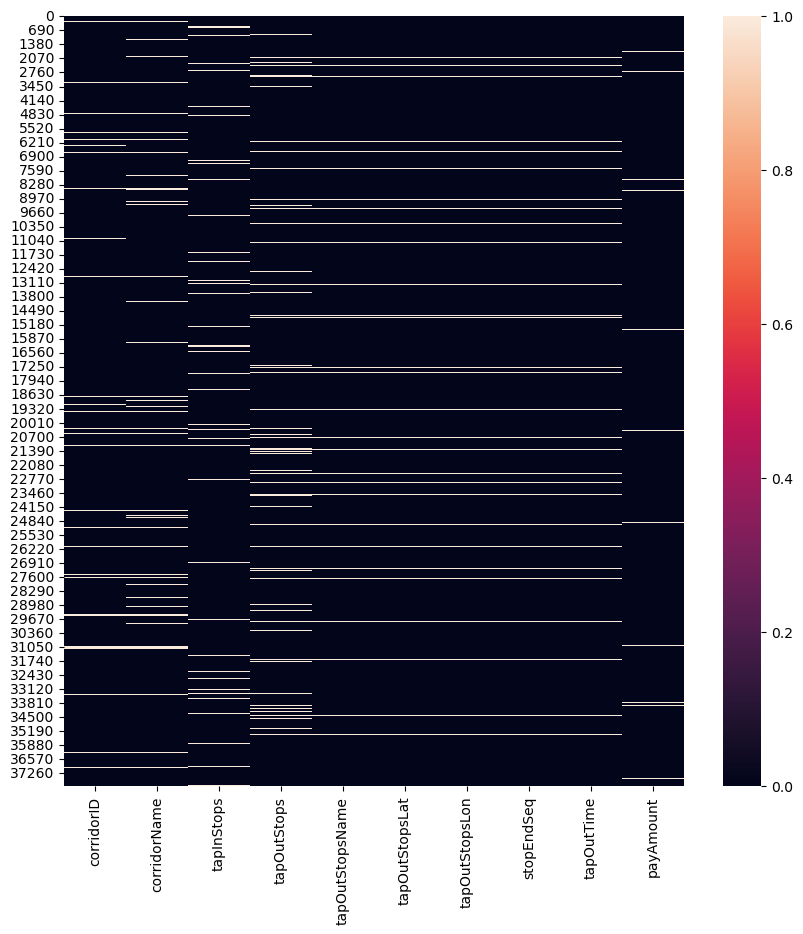

In [7]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID','corridorName','tapInStops','tapOutStops','tapOutStopsName','tapOutStopsLat','tapOutStopsLon','stopEndSeq','tapOutTime','payAmount']].isna())

Secara garis besar:  
* *missing value* paling besar berada di `tapOutStops` 6.09%.
* *missing value* di kolom `tapOutStopsName`,	`tapOutStopsLat`,	`tapOutStopsLon`,	`stopEndSeq`,	`tapOutTime` memiliki sebaran yang terlihat berkaitan, jika data di `tapOutStopsName` kosong, maka data di terkait juga kosong.  

Ada 2 cara untuk menangani *missing value*:
* pertama, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.
* kedua, menghapus baris yang berisi *missing value*. di kolom `tapOutStopsName`,	`tapOutStopsLat`,	`tapOutStopsLon`,	`stopEndSeq`,	`tapOutTime` memiliki sebaran yang terlihat berkaitan

In [8]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

#### `tapOutStopsName`,	`tapOutStopsLat`,	`tapOutStopsLon`,	`stopEndSeq`,	`tapOutTime` yang kosong

In [9]:
# Cek apakah semua kolom tapOut kosong (missing) secara bersamaan
tapout_cols = [
    'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat',
    'tapOutStopsLon', 'stopEndSeq', 'tapOutTime'
]

# Buat kolom boolean: True jika SEMUA kolom tersebut NaN di baris tersebut
df['all_tapout_missing'] = df[tapout_cols].isnull().all(axis=1)

# Hitung berapa banyak baris yang memiliki semua nilai tap-out kosong
missing_count = df['all_tapout_missing'].sum()
total_rows = len(df)
percentage_missing = (missing_count / total_rows) * 100

missing_count, percentage_missing

(1344, 3.546174142480211)

Dari analisis di atas, kita sudah tau bahwa *missing value* 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat',
    'tapOutStopsLon', 'stopEndSeq', 'tapOutTime' saling berkaitan. Maka, kita akan memutuskan menghapus *missing value*.

In [10]:
df_clean = df.dropna(subset=['tapOutStopsName'])

In [11]:
df_clean.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,False
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,False
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,False
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,False
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,False


In [12]:
df_clean.isna().sum()

transID               0   
payCardID             0   
payCardBank           0   
payCardName           0   
payCardSex            0   
payCardBirthDate      0   
corridorID            1205
corridorName          1854
direction             0   
tapInStops            1177
tapInStopsName        0   
tapInStopsLat         0   
tapInStopsLon         0   
stopStartSeq          0   
tapInTime             0   
tapOutStops           945 
tapOutStopsName       0   
tapOutStopsLat        0   
tapOutStopsLon        0   
stopEndSeq            0   
tapOutTime            0   
payAmount             968 
all_tapout_missing    0   
dtype: int64

`tapOutStopsName`,	`tapOutStopsLat`,	`tapOutStopsLon`,	`stopEndSeq`,	`tapOutTime` sudah Bersih

#### Mengisi yang kosong`tapOutStop` berdasarkan	`tapOutStopsName`, dan '`tapInStopsName`

In [13]:
# Buat mapping dari tapOutStopsName ke tapOutStops (ambil nilai pertama yang ada)
mapping = df_clean.dropna(subset=['tapOutStops']).groupby('tapOutStopsName')['tapOutStops'].first()

# Isi nilai yang kosong
df_clean['tapOutStops'] = df_clean['tapOutStops'].fillna(df_clean['tapOutStopsName'].map(mapping))

In [14]:
df_clean.isna().sum()

transID               0   
payCardID             0   
payCardBank           0   
payCardName           0   
payCardSex            0   
payCardBirthDate      0   
corridorID            1205
corridorName          1854
direction             0   
tapInStops            1177
tapInStopsName        0   
tapInStopsLat         0   
tapInStopsLon         0   
stopStartSeq          0   
tapInTime             0   
tapOutStops           19  
tapOutStopsName       0   
tapOutStopsLat        0   
tapOutStopsLon        0   
stopEndSeq            0   
tapOutTime            0   
payAmount             968 
all_tapout_missing    0   
dtype: int64

In [15]:
df_missing_tapout = df_clean[df_clean['tapOutStops'].isna()]
df_missing_tapout.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing
32068,BXRQ766N7W94KH,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05022P,...,2,2023-04-08 16:32:00,NaN,Jln. H. Yahya,-6.230219,106.87122,5.0,2023-04-08 17:20:01,0.0,False
32419,SRCX260G7J04ZB,343897458234312,emoney,Rahayu Prabowo,M,1973,JAK.75,Cililitan - Kp. Pulo,1.0,B03111P,...,0,2023-04-09 19:56:07,NaN,Sbr. Jl H Emuntipala I,-6.277035,106.87761,5.0,2023-04-09 20:31:15,0.0,False
32570,CSCL544U0W09DD,503837878738,flazz,Rahmi Lazuardi,M,1982,JAK.11,Tanah Abang - Kebayoran Lama,1.0,B05102P,...,20,2023-04-08 08:55:05,NaN,Sbr. Ps. Pisang,-6.207759,106.79233,25.0,2023-04-08 09:14:01,0.0,False
32926,FOHO550C4G76FJ,3543024804143004,dki,R. Oni Lailasari,M,1996,JAK.49,Lebak Bulus - Cipulir,0.0,B00479P,...,9,2023-04-15 11:36:25,NaN,Exit Tol Veteran Bintaro,-6.262649,106.76654,39.0,2023-04-15 13:04:15,0.0,False
32960,SLEX356F6M31TA,4713105079051022,dki,Gangsar Palastri,F,1984,JAK.64,Lenteng Agung - Aseli,1.0,B04556P,...,2,2023-04-16 09:06:57,NaN,MIN 8 Srengseng Sawah,-6.335943,106.82628,17.0,2023-04-16 10:59:28,0.0,False


In [16]:
mask = (df_clean['tapOutStopsName'] ==df_clean['tapInStopsName']) &df_clean['tapOutStops'].isna()
df_clean.loc[mask, 'tapOutStops'] =df_clean.loc[mask, 'tapInStops']

In [17]:
# 1. Buat DataFrame referensi dari pasangan tapInStops dan tapInStopsName yang unik
ref_df = df_clean[['tapInStops', 'tapInStopsName']].drop_duplicates().dropna()

# 2. Buat dictionary untuk mapping
# Key: tapInStopsName, Value: tapInStops
in_mapping = ref_df.set_index('tapInStopsName')['tapInStops'].to_dict()

# 3. Isi tapOutStops yang kosong berdasarkan referensi
def fill_tap_out(row):
    if pd.isna(row['tapOutStops']) and pd.notna(row['tapOutStopsName']):
        # Coba cari dari mapping
        if row['tapOutStopsName'] in in_mapping:
            return in_mapping[row['tapOutStopsName']]
    
    return row['tapOutStops']

# Terapkan fungsi pengisian
df_clean['tapOutStops'] = df_clean.apply(fill_tap_out, axis=1)

In [18]:
ref_df.isna().sum()

tapInStops        0
tapInStopsName    0
dtype: int64

In [19]:
# out_mapping = (df_clean.dropna(subset=['tapOutStops'])
#                .groupby('tapOutStopsName')['tapOutStops']
#                .first()
#                .to_dict())

# # Mapping dari tapInStopsName ke tapOutStops
# in_mapping = (df_clean.dropna(subset=['tapOutStops', 'tapInStopsName'])
#               .groupby('tapInStopsName')['tapOutStops']
#               .first()
#               .to_dict())

# # Isi berdasarkan mapping
# df_clean['tapOutStops'] = df_clean['tapOutStops'].fillna(
#     df_clean['tapOutStopsName'].map(out_mapping))
    
# df_clean['tapOutStops'] = df_clean['tapOutStops'].fillna(
#     df_clean['tapInStopsName'].map(in_mapping))

In [20]:
df_clean['tapOutStops'].isna().sum()

10

In [21]:
df_missing_tapout = df_clean[df_clean['tapOutStops'].isna()]
df_missing_tapout.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing
32068,BXRQ766N7W94KH,3582791887979981,dki,Tgk. Keisha Hutasoit,M,1973,JAK.02,Kampung Melayu - Duren Sawit,0.0,B05022P,...,2,2023-04-08 16:32:00,NaN,Jln. H. Yahya,-6.230219,106.87122,5.0,2023-04-08 17:20:01,0.0,False
32960,SLEX356F6M31TA,4713105079051022,dki,Gangsar Palastri,F,1984,JAK.64,Lenteng Agung - Aseli,1.0,B04556P,...,2,2023-04-16 09:06:57,NaN,MIN 8 Srengseng Sawah,-6.335943,106.82628,17.0,2023-04-16 10:59:28,0.0,False
33961,POUD123Y3H41XB,4300964686794,online,Ir. Prakosa Maryadi,F,1994,JAK.21,Cililitan - Dwikora,0.0,B01724P,...,5,2023-04-23 06:17:27,NaN,Grha Intirub,-6.265216,106.87599,7.0,2023-04-23 08:08:49,0.0,False
34084,EQOM074W9Q50QT,3523501988176433,dki,Eli Mangunsong,F,2001,JAK.64,Lenteng Agung - Aseli,1.0,B00785P,...,13,2023-04-23 21:26:34,NaN,Jln. Timbul III,-6.350411,106.80329,32.0,2023-04-23 22:53:38,0.0,False
34130,NJCG199T7J76PN,30007077737525,bni,Ida Rahayu,F,1999,JAK.37,Cililitan - Condet via Kayu Manis,1.0,B03532P,...,21,2023-04-30 08:39:19,NaN,Griya Galaxy 126,-6.283553,106.86431,25.0,2023-04-30 09:32:48,0.0,False


Mengisi `tapOutStopsName` yang masih kosong dengan modus

In [22]:
modus_tapout = df_clean['tapOutStops'].mode().iloc[0]
df_clean['tapOutStops'] = df_clean['tapOutStops'].fillna(modus_tapout)


In [23]:
df_missing_tapout = df_clean[df_clean['tapOutStops'].isna()]
df_missing_tapout.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing


In [24]:
df_clean[df_clean['tapOutStops'].isna()]

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing


In [25]:
df_clean.isna().sum()

transID               0   
payCardID             0   
payCardBank           0   
payCardName           0   
payCardSex            0   
payCardBirthDate      0   
corridorID            1205
corridorName          1854
direction             0   
tapInStops            1177
tapInStopsName        0   
tapInStopsLat         0   
tapInStopsLon         0   
stopStartSeq          0   
tapInTime             0   
tapOutStops           0   
tapOutStopsName       0   
tapOutStopsLat        0   
tapOutStopsLon        0   
stopEndSeq            0   
tapOutTime            0   
payAmount             968 
all_tapout_missing    0   
dtype: int64

`tapOutStopsName` sudah tidak ada yang missing value

#### Mengisi missing value `tapInStopsName` berdasarkan `tapInStops`

In [26]:
# 1. Membuat mapping dictionary dari ref_df
ref_mapping = ref_df.dropna(subset=['tapInStopsName', 'tapInStops'])\
                    .drop_duplicates('tapInStopsName')\
                    .set_index('tapInStopsName')['tapInStops']\
                    .to_dict()

# 2. Fungsi untuk mengisi nilai yang kosong
def fill_tap_in(row):
    if pd.isna(row['tapInStops']) and pd.notna(row['tapInStopsName']):
        return ref_mapping.get(row['tapInStopsName'], row['tapInStops'])
    return row['tapInStops']

# 3. Mengaplikasikan fungsi pengisian
df_clean['tapInStops'] = df_clean.apply(fill_tap_in, axis=1)

In [27]:
df_clean[['tapInStopsName']][df_clean['tapInStops'].isna()].head()

,tapInStopsName
32365,Bundaran Alam Sutera 1
32533,Graha Sindu Bpk Penabur
32572,Rusun Rorotan 2
32663,Jln. Pinang 1
32768,Fatmawati 1


missing value `tapInStopsName` sisa diisi dengan nilai modus

In [28]:
modus_tapin = df_clean['tapInStops'].mode().iloc[0]
modus_tapin

'P00170'

In [29]:
df_clean['tapInStops'] = df_clean['tapInStops'].fillna(modus_tapin)

In [30]:
df_clean.isna().sum()

transID               0   
payCardID             0   
payCardBank           0   
payCardName           0   
payCardSex            0   
payCardBirthDate      0   
corridorID            1205
corridorName          1854
direction             0   
tapInStops            0   
tapInStopsName        0   
tapInStopsLat         0   
tapInStopsLon         0   
stopStartSeq          0   
tapInTime             0   
tapOutStops           0   
tapOutStopsName       0   
tapOutStopsLat        0   
tapOutStopsLon        0   
stopEndSeq            0   
tapOutTime            0   
payAmount             968 
all_tapout_missing    0   
dtype: int64

`tapInStopsName` sudah tidak ada missing value

#### 'corridorName' dan 'corridorID'

In [31]:
# (Asumsi data utama sudah ada di df)
df_ref_corridor = df_clean[['tapInStops', 'corridorName']].dropna().drop_duplicates()

# 2. Membuat dictionary mapping dari referensi
corridor_mapping = df_ref_corridor.set_index('tapInStops')['corridorName'].to_dict()

# 3. Fungsi untuk mengisi corridorName yang kosong
def fill_corridor(row):
    if pd.isna(row['corridorName']) and pd.notna(row['tapInStops']):
        return corridor_mapping.get(row['tapInStops'], row['corridorName'])
    return row['corridorName']

# 4. Mengisi nilai yang kosong
df_clean['corridorName'] = df_clean.apply(fill_corridor, axis=1)

In [32]:
df_ref_corridor.isna().sum()

tapInStops      0
corridorName    0
dtype: int64

In [33]:
df_clean['corridorName'].isna().sum()

52

In [34]:
df_clean[df_clean['corridorName'].isna()].head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing
32188,BKNV607A3K70FG,4582025937312,online,dr. Melinda Pangestu,M,1981,NaN,NaN,1.0,B05998P,...,16,2023-04-08 05:06:49,B05999P,Jln. Budi Mulia Utara,-6.129200,106.83856,17.0,2023-04-08 06:50:12,0.0,False
32200,MIMD100Q9Q52AB,3589887902314387,dki,Nalar Hasanah,F,2003,JAK.31,NaN,0.0,B05183P,...,41,2023-04-09 07:14:16,B01147P,Jln. H. Terin Pangkalan Jati,-6.327961,106.80054,56.0,2023-04-09 07:49:24,0.0,False
32216,WFYV607B7M77NB,3524537484100286,dki,Kenzie Dabukke,F,1981,NaN,NaN,1.0,B05118P,...,16,2023-04-09 15:32:21,B03996P,Sbr. Lapangan Kaprina,-6.347390,106.88437,27.0,2023-04-09 15:57:06,0.0,False
32304,VIAE276T8E53BR,180032529782349,emoney,"Luis Haryanto, S.Ked",F,1986,NaN,NaN,0.0,B04143P,...,32,2023-04-08 10:37:53,B05443P,St. Gg. Sentiong,-6.185997,106.85083,42.0,2023-04-08 11:54:42,0.0,False
32343,TXHS189M0C99UJ,6011379876309750,dki,Hani Mandasari,F,1999,NaN,NaN,0.0,B02409P,...,27,2023-04-08 11:53:44,B01449P,Jln. Pancoran Indah 1,-6.251998,106.84266,31.0,2023-04-08 12:53:48,3500.0,False


#### 'corridorName' dan 

In [35]:
df_ref_corridor_2 = df_clean[['corridorID', 'corridorName']].dropna().drop_duplicates()

# 2. Membuat dictionary mapping dari referensi
corridor_mapping_2 = df_ref_corridor_2.set_index('corridorID')['corridorName'].to_dict()

# 3. Fungsi untuk mengisi corridorName yang kosong
def fill_corridor(row):
    if pd.isna(row['corridorName']) and pd.notna(row['corridorID']):
        return corridor_mapping_2.get(row['corridorID'], row['corridorName'])
    return row['corridorName']

# 4. Mengisi nilai yang kosong
df_clean['corridorName'] = df_clean.apply(fill_corridor, axis=1)

In [36]:
df_clean['corridorName'].isna().sum()

33

In [37]:
df_clean[df_clean['corridorName'].isna()].head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing
32188,BKNV607A3K70FG,4582025937312,online,dr. Melinda Pangestu,M,1981,NaN,NaN,1.0,B05998P,...,16,2023-04-08 05:06:49,B05999P,Jln. Budi Mulia Utara,-6.129200,106.83856,17.0,2023-04-08 06:50:12,0.0,False
32216,WFYV607B7M77NB,3524537484100286,dki,Kenzie Dabukke,F,1981,NaN,NaN,1.0,B05118P,...,16,2023-04-09 15:32:21,B03996P,Sbr. Lapangan Kaprina,-6.347390,106.88437,27.0,2023-04-09 15:57:06,0.0,False
32304,VIAE276T8E53BR,180032529782349,emoney,"Luis Haryanto, S.Ked",F,1986,NaN,NaN,0.0,B04143P,...,32,2023-04-08 10:37:53,B05443P,St. Gg. Sentiong,-6.185997,106.85083,42.0,2023-04-08 11:54:42,0.0,False
32343,TXHS189M0C99UJ,6011379876309750,dki,Hani Mandasari,F,1999,NaN,NaN,0.0,B02409P,...,27,2023-04-08 11:53:44,B01449P,Jln. Pancoran Indah 1,-6.251998,106.84266,31.0,2023-04-08 12:53:48,3500.0,False
32461,BILC767D0D04TI,3549196554775237,dki,Harjaya Wacana,F,1998,NaN,NaN,1.0,B02567P,...,25,2023-04-09 21:41:09,B06177P,Pool Pangkalan Jati,-6.248386,106.91713,29.0,2023-04-09 22:22:39,0.0,False


#### 'corridorID' dan 

In [38]:
df_ref_corridor_2.isna().sum()

corridorID      0
corridorName    0
dtype: int64

In [39]:
# 2. Membuat dictionary mapping dari referensi
corridorID_mapping = df_ref_corridor_2.set_index('corridorName')['corridorID'].to_dict()

# 3. Fungsi untuk mengisi corridorID yang kosong
def fill_corridorID(row):
    if pd.isna(row['corridorID']) and pd.notna(row['corridorName']):
        return corridorID_mapping.get(row['corridorName'], row['corridorID'])
    return row['corridorID']

# 4. Mengisi nilai yang kosong
df_clean['corridorID'] = df_clean.apply(fill_corridorID, axis=1)

In [40]:
df_clean['corridorID'].isna().sum()

33

In [41]:
df_clean[df_clean['corridorID'].isna()].head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing
32188,BKNV607A3K70FG,4582025937312,online,dr. Melinda Pangestu,M,1981,NaN,NaN,1.0,B05998P,...,16,2023-04-08 05:06:49,B05999P,Jln. Budi Mulia Utara,-6.129200,106.83856,17.0,2023-04-08 06:50:12,0.0,False
32216,WFYV607B7M77NB,3524537484100286,dki,Kenzie Dabukke,F,1981,NaN,NaN,1.0,B05118P,...,16,2023-04-09 15:32:21,B03996P,Sbr. Lapangan Kaprina,-6.347390,106.88437,27.0,2023-04-09 15:57:06,0.0,False
32304,VIAE276T8E53BR,180032529782349,emoney,"Luis Haryanto, S.Ked",F,1986,NaN,NaN,0.0,B04143P,...,32,2023-04-08 10:37:53,B05443P,St. Gg. Sentiong,-6.185997,106.85083,42.0,2023-04-08 11:54:42,0.0,False
32343,TXHS189M0C99UJ,6011379876309750,dki,Hani Mandasari,F,1999,NaN,NaN,0.0,B02409P,...,27,2023-04-08 11:53:44,B01449P,Jln. Pancoran Indah 1,-6.251998,106.84266,31.0,2023-04-08 12:53:48,3500.0,False
32461,BILC767D0D04TI,3549196554775237,dki,Harjaya Wacana,F,1998,NaN,NaN,1.0,B02567P,...,25,2023-04-09 21:41:09,B06177P,Pool Pangkalan Jati,-6.248386,106.91713,29.0,2023-04-09 22:22:39,0.0,False


In [42]:
df_clean.isna().sum()

transID               0  
payCardID             0  
payCardBank           0  
payCardName           0  
payCardSex            0  
payCardBirthDate      0  
corridorID            33 
corridorName          33 
direction             0  
tapInStops            0  
tapInStopsName        0  
tapInStopsLat         0  
tapInStopsLon         0  
stopStartSeq          0  
tapInTime             0  
tapOutStops           0  
tapOutStopsName       0  
tapOutStopsLat        0  
tapOutStopsLon        0  
stopEndSeq            0  
tapOutTime            0  
payAmount             968
all_tapout_missing    0  
dtype: int64

In [43]:
df_clean = df_clean.dropna(subset=['corridorName'])

In [44]:
df_clean.isna().sum()

transID               0  
payCardID             0  
payCardBank           0  
payCardName           0  
payCardSex            0  
payCardBirthDate      0  
corridorID            0  
corridorName          0  
direction             0  
tapInStops            0  
tapInStopsName        0  
tapInStopsLat         0  
tapInStopsLon         0  
stopStartSeq          0  
tapInTime             0  
tapOutStops           0  
tapOutStopsName       0  
tapOutStopsLat        0  
tapOutStopsLon        0  
stopEndSeq            0  
tapOutTime            0  
payAmount             968
all_tapout_missing    0  
dtype: int64

'corridorID' 'corridorName' sudah tidak ada missing value

#### Mengisi missing value `payAmount` menggunakan modus

In [45]:
modus_pay = df_clean['payAmount'].mode().iloc[0]
modus_pay

3500.0

In [46]:
df_clean['payAmount'] = df_clean['payAmount'].fillna(modus_pay)

In [47]:
df_clean.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName          0
direction             0
tapInStops            0
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops           0
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount             0
all_tapout_missing    0
dtype: int64

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [48]:
def create_data_description(df, sample_size=2):
    """
    Membuat DataFrame berisi deskripsi kolom
    
    Parameters:
    df (pd.DataFrame): DataFrame input (dalam kasus ini df_clean)
    sample_size (int): Jumlah sample nilai unik yang ditampilkan
    
    Returns:
    pd.DataFrame: DataFrame berisi deskripsi kolom
    """
    description = []
    
    for col in df.columns:
        # Hitung statistik dasar
        null_count = df[col].isnull().sum()
        unique_count = df[col].nunique()
        
        # Ambil sample nilai unik (acak)
        unique_vals = df[col].dropna().unique()
        np.random.shuffle(unique_vals)
        unique_sample = list(unique_vals[:min(sample_size, len(unique_vals))])
        
        # Tentukan tipe data
        dtype = str(df[col].dtype)
        
        description.append({
            'dataFeatures': col,
            'dataType': dtype,
            'null': null_count,
            'unique': unique_count,
            'uniqueSample': unique_sample
        })
    
    return pd.DataFrame(description)

# Gunakan fungsi pada df_clean
desc_df = create_data_description(df_clean)

# Tampilkan hasil
desc_df[['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample']]

,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,36523,"[QDCX172W7L18UA, MCKG469D1G94SV]"
1,payCardID,int64,0,1987,"[213129456959329, 36291352939899]"
2,payCardBank,object,0,6,"[bni, flazz]"
3,payCardName,object,0,1980,"[Mulyanto Firmansyah, S.H., Gawati Tarihoran]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,67,"[1976, 1994]"
6,corridorID,object,0,221,"[5B, JAK.77]"
7,corridorName,object,0,216,"[Kebayoran Lama - Tanah Abang, Jakarta International Stadium - Senen]"
8,direction,float64,0,2,"[0.0, 1.0]"
9,tapInStops,object,0,2505,"[B04550P, B00243P]"


Sebelum dibersihkan, kita memiliki 37.900 baris data, sekarang kita memiliki 36.523 baris. Sekitar 1500 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Data Analysis

In [49]:
# df_clean.to_csv('Transjakarta_cleansing.csv', index=False)

In [50]:
df = pd.read_csv('Transjakarta_cleansing.csv')

In [51]:
df.isna().sum()

transID               0
payCardID             0
payCardBank           0
payCardName           0
payCardSex            0
payCardBirthDate      0
corridorID            0
corridorName          0
direction             0
tapInStops            0
tapInStopsName        0
tapInStopsLat         0
tapInStopsLon         0
stopStartSeq          0
tapInTime             0
tapOutStops           0
tapOutStopsName       0
tapOutStopsLat        0
tapOutStopsLon        0
stopEndSeq            0
tapOutTime            0
payAmount             0
all_tapout_missing    0
dtype: int64

In [52]:
# Hitung usia dari kolom payCardBirthDate
df['age'] = 2023 - df['payCardBirthDate'].astype(int)

# Konversi waktu ke datetime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])



In [53]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing,age
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,False,15
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,False,26
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,False,31
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,False,45
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,False,41


In [54]:
df['duration_min'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

In [55]:
df['duration_min'].describe()

count    36523.000000
mean     72.132099   
std      28.072138   
min      15.000000   
25%      51.133333   
50%      71.850000   
75%      95.800000   
max      179.050000  
Name: duration_min, dtype: float64

In [56]:
df.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,all_tapout_missing,age,duration_min
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,False,15,39.150000
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,False,26,57.283333
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,False,31,51.816667
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,False,45,43.416667
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,False,41,39.466667


## Berdasarkan Gender

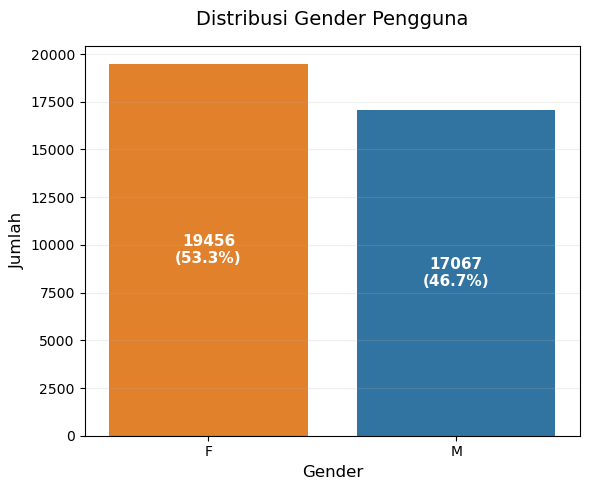

In [57]:
plt.figure(figsize=(6, 5))

# Hitung persentase
gender_counts = df['payCardSex'].value_counts(normalize=True) * 100
counts = df['payCardSex'].value_counts()

# Buat plot
ax = sns.countplot(data=df, x='payCardSex', palette={'M':'#1f77b4','F':'#ff7f0e'}, 
                  order=counts.index)

plt.title('Distribusi Gender Pengguna', fontsize=14, pad=15)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.grid(axis='y', alpha=0.2)

# Tambahkan label di dalam batang
for i, (count, pct) in enumerate(zip(counts, gender_counts)):
    ax.text(i, count/2,  # Posisi vertikal di tengah batang
            f"{count}\n({pct:.1f}%)", 
            ha='center', 
            va='center',
            color='white',
            fontsize=11,
            fontweight='bold')

plt.tight_layout()
plt.show()

## Berdasarkan Usia

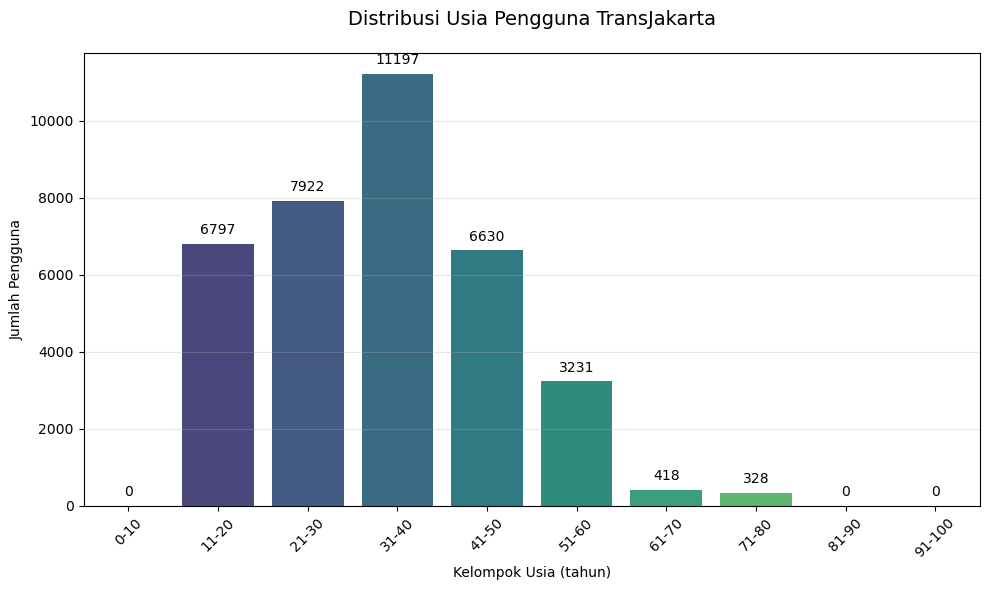

In [58]:
plt.figure(figsize=(10, 6))

# Buat bins setiap 10 tahun
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Buat kolom kelompok usia
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Hitung frekuensi
age_dist = df['age_group'].value_counts().sort_index()

# Visualisasi
barplot = sns.barplot(x=age_dist.index, y=age_dist.values, palette='viridis')

plt.title('Distribusi Usia Pengguna TransJakarta', fontsize=14, pad=20)
plt.xlabel('Kelompok Usia (tahun)')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45)

# Tambahkan label nilai
for p in barplot.patches:
    barplot.annotate(f"{int(p.get_height())}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Berdasarkan Jenis Kartu

In [59]:
# Hitung jumlah transaksi per jenis kartu
kartu_counts = df['payCardBank'].value_counts().reset_index()
kartu_counts.columns = ['Jenis_Kartu', 'Jumlah_Transaksi']

print("Jumlah Penggunaan per Jenis Kartu:")
print(kartu_counts)

Jumlah Penggunaan per Jenis Kartu:
  Jenis_Kartu  Jumlah_Transaksi
0  dki         18038           
1  emoney      6633            
2  brizzi      3397            
3  flazz       3104            
4  online      2771            
5  bni         2580            


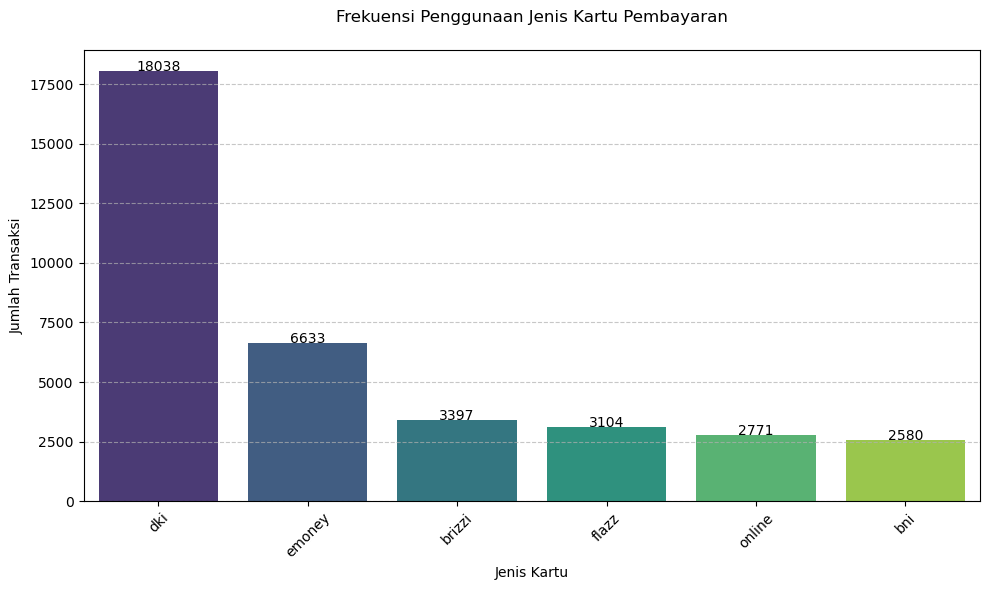

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=kartu_counts, 
    x='Jenis_Kartu', 
    y='Jumlah_Transaksi',
    palette='viridis'
)

plt.title('Frekuensi Penggunaan Jenis Kartu Pembayaran', pad=20)
plt.xlabel('Jenis Kartu')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambah label nilai di atas bar
for index, row in kartu_counts.iterrows():
    plt.text(
        index, 
        row.Jumlah_Transaksi + 0.5, 
        str(row.Jumlah_Transaksi),
        ha='center'
    )

plt.tight_layout()
plt.show()

## Persebaran

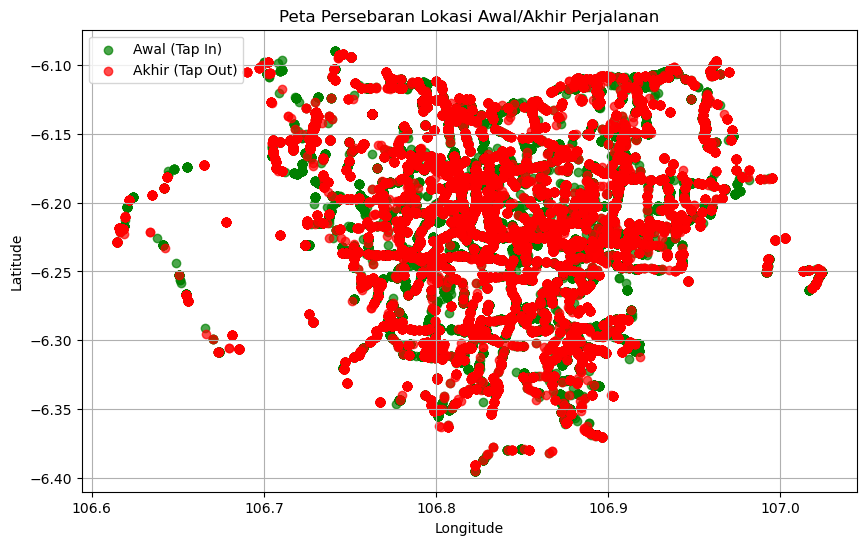

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df['tapInStopsLon'], df['tapInStopsLat'], color='green', label='Awal (Tap In)', alpha=0.7)
plt.scatter(df['tapOutStopsLon'], df['tapOutStopsLat'], color='red', label='Akhir (Tap Out)', alpha=0.7)
plt.title('Peta Persebaran Lokasi Awal/Akhir Perjalanan')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid()
plt.show()

In [62]:
valid_data = df.dropna(subset=['duration_min'])
# Ekstrak nama hari (Indonesian locale)
days_id = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
valid_data['day_name'] = valid_data['tapInTime'].dt.dayofweek.map(lambda x: days_id[x])
valid_data['day_num'] = valid_data['tapInTime'].dt.dayofweek  # Senin=0, Minggu=6

In [63]:
# Hitung statistik
daily_stats = valid_data.groupby(['day_num', 'day_name'])['duration_min'].agg(['mean', 'median', 'count'])
daily_stats = daily_stats.reset_index().sort_values('day_num')

print("Rata-rata Durasi per Hari:")
print(daily_stats[['day_name', 'mean', 'median', 'count']])

Rata-rata Durasi per Hari:
  day_name       mean     median  count
0  Senin    72.149258  72.000000  6605 
1  Selasa   71.822289  71.533333  6593 
2  Rabu     72.622137  72.566667  6575 
3  Kamis    72.354603  71.983333  6575 
4  Jumat    72.400293  72.050000  6645 
5  Sabtu    70.125754  68.591667  1746 
6  Minggu   71.552065  71.583333  1784 


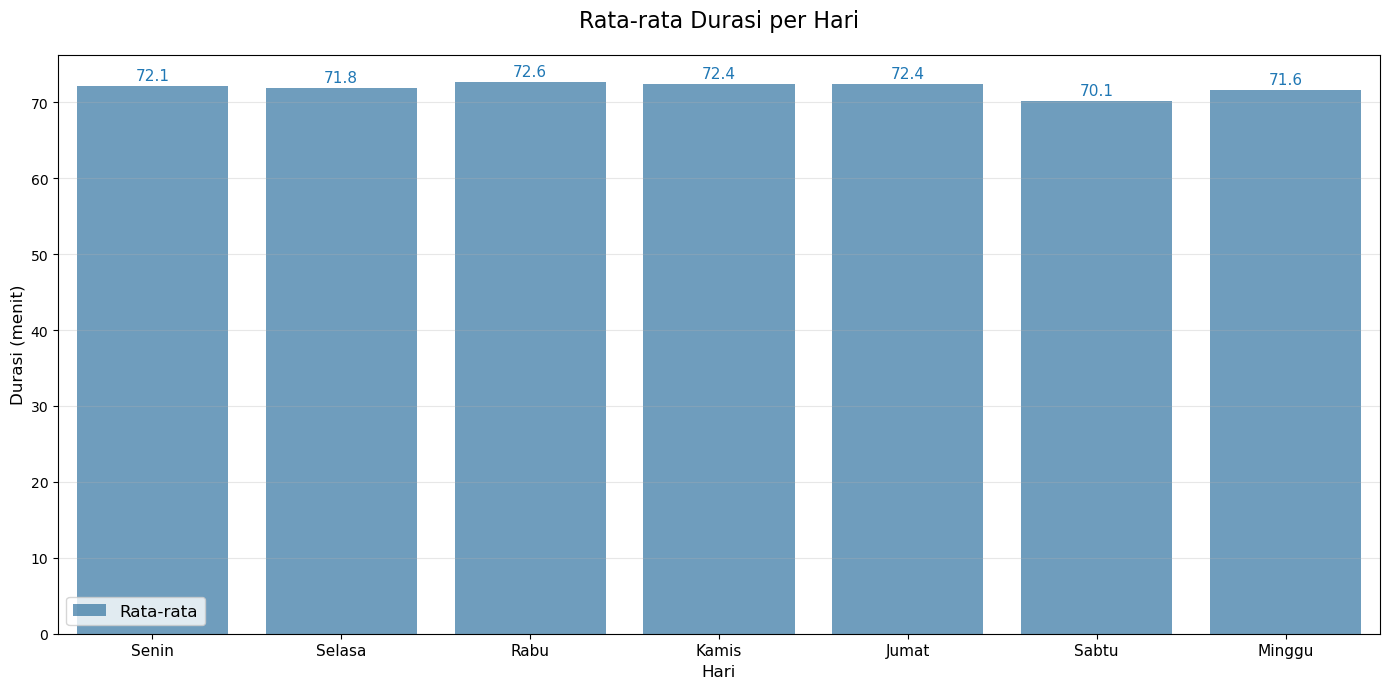

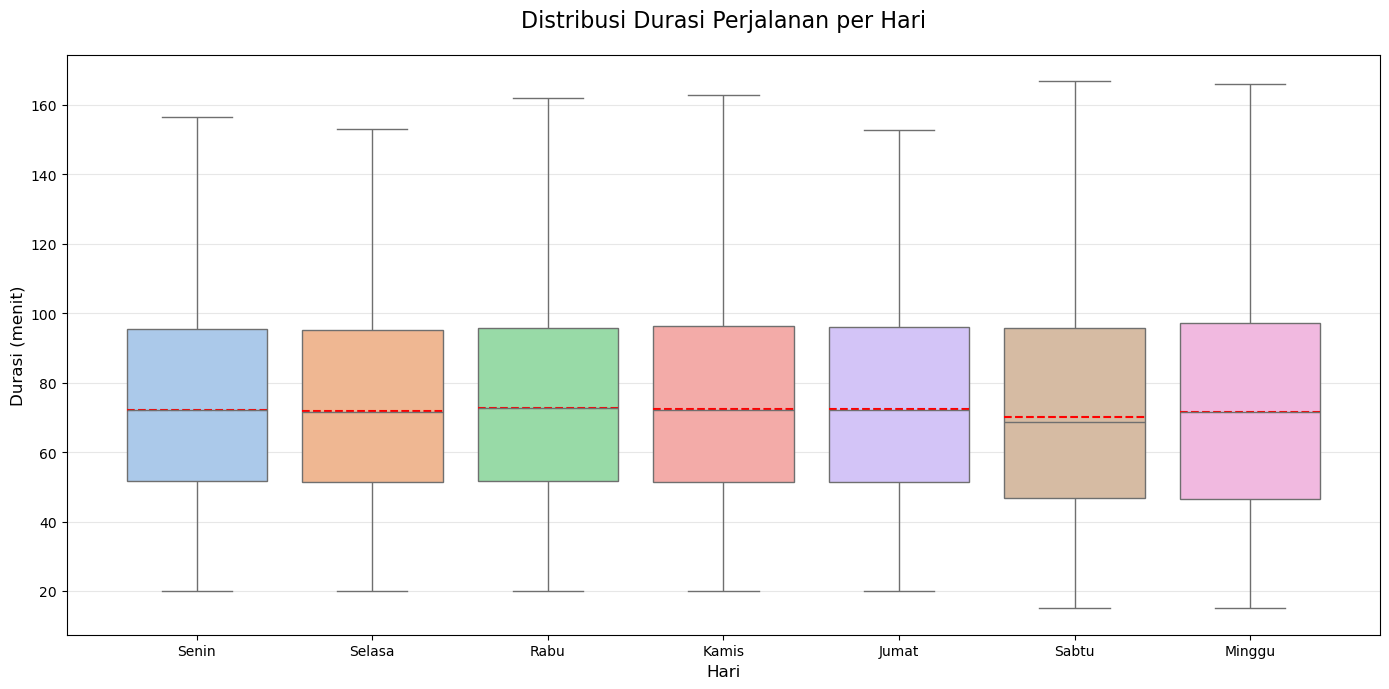

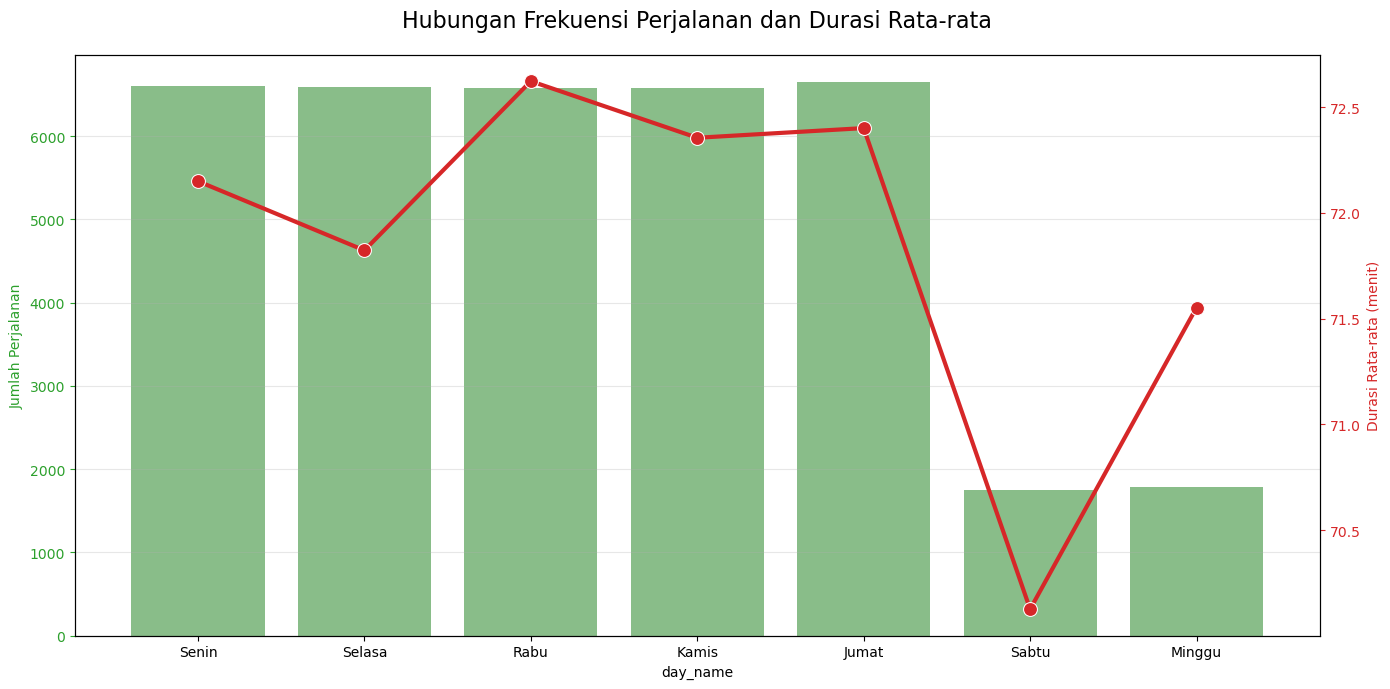


Perbandingan Statistik Weekday vs Weekend:
       Weekday  Weekend
count  32993.0  3530.0 
mean   72.3     70.8   
std    27.8     30.6   
min    20.0     15.0   
25%    51.4     46.6   
50%    72.0     70.1   
75%    95.7     96.6   
max    179.0    179.0  


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

# 1. Analisis Komparatif Mean-Median
plt.figure(figsize=(14, 7))

# Batang untuk mean
ax = sns.barplot(data=daily_stats, x='day_name', y='mean', 
                 color='#1f77b4', alpha=0.7, label='Rata-rata')

# Garis untuk median
# sns.lineplot(data=daily_stats, x='day_name', y='median', 
#              color='#ff7f0e', marker='o', markersize=10,
#              linewidth=2.5, label='Median', ax=ax)

plt.title('Rata-rata Durasi per Hari', fontsize=16, pad=20)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Durasi (menit)', fontsize=12)
plt.xticks(fontsize=11)
plt.legend(fontsize=12)

# Anotasi nilai
for i, row in daily_stats.iterrows():
    ax.text(i, row['mean']+0.8, f"{row['mean']:.1f}", ha='center', fontsize=11, color='#1f77b4')
    # ax.text(i, row['median']+0.8, f"{row['median']:.1f}", ha='center', fontsize=11, color='#ff7f0e')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Analisis Distribusi Harian
plt.figure(figsize=(14, 7))
sns.boxplot(data=valid_data, x='day_name', y='duration_min', 
           order=days_id, palette='pastel', showfliers=False)

plt.title('Distribusi Durasi Perjalanan per Hari', fontsize=16, pad=20)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Durasi (menit)', fontsize=12)

# Tambah garis rata-rata
for i, day in enumerate(days_id):
    avg = daily_stats[daily_stats['day_name']==day]['mean'].values[0]
    plt.hlines(avg, i-0.4, i+0.4, colors='red', linestyles='dashed', linewidth=1.5)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. Analisis Frekuensi vs Durasi
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot frekuensi
ax1 = sns.barplot(data=daily_stats, x='day_name', y='count', 
                 color='#2ca02c', alpha=0.6, ax=ax1)
ax1.set_ylabel('Jumlah Perjalanan', color='#2ca02c')
ax1.tick_params(axis='y', colors='#2ca02c')

# Plot durasi
ax2 = ax1.twinx()
sns.lineplot(data=daily_stats, x='day_name', y='mean', 
            color='#d62728', marker='o', markersize=10,
            linewidth=3, ax=ax2)
ax2.set_ylabel('Durasi Rata-rata (menit)', color='#d62728')
ax2.tick_params(axis='y', colors='#d62728')

plt.title('Hubungan Frekuensi Perjalanan dan Durasi Rata-rata', fontsize=16, pad=20)
plt.xlabel('Hari', fontsize=12)
ax1.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Analisis Statistik Mendalam
weekday_mask = valid_data['day_num'] < 5
weekday_stats = valid_data[weekday_mask]['duration_min'].describe()
weekend_stats = valid_data[~weekday_mask]['duration_min'].describe()

print("\nPerbandingan Statistik Weekday vs Weekend:")
print(pd.DataFrame({'Weekday': weekday_stats, 'Weekend': weekend_stats}).round(1))

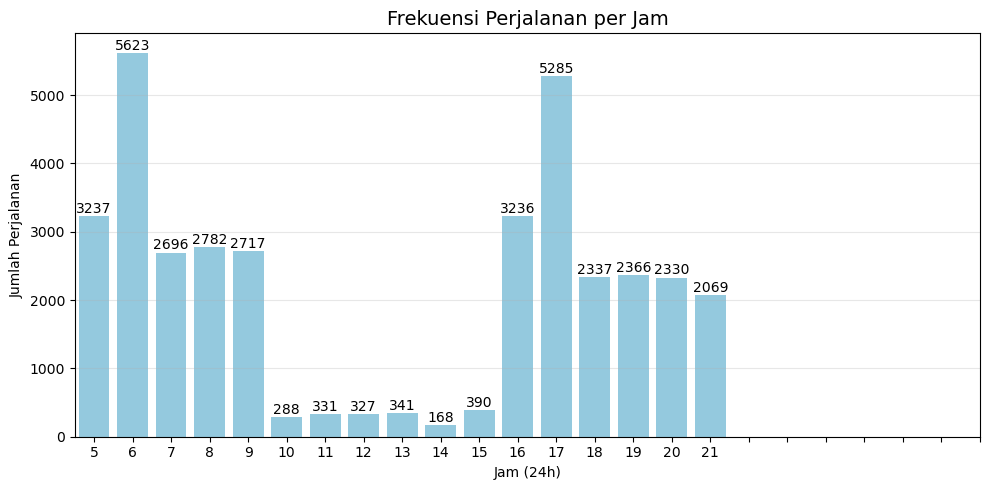

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data dan Pembersihan Dasar
try:
    # Konversi waktu
    df['tapInTime'] = pd.to_datetime(df['tapInTime'], format='%d/%m/%y %H:%M', errors='coerce')
    
    # Filter data valid
    valid_data = df.dropna(subset=['tapInTime']).copy()
  

except Exception as e:
    print(f"Error saat memproses data: {e}")
    valid_data = pd.DataFrame()  # Fallback empty dataframe

# 2. Ekstrak Jam dan Hari
if not valid_data.empty:
    valid_data['hour'] = valid_data['tapInTime'].dt.hour
    valid_data['day_name'] = valid_data['tapInTime'].dt.day_name().map({
        'Monday': 'Senin',
        'Tuesday': 'Selasa',
        'Wednesday': 'Rabu',
        'Thursday': 'Kamis',
        'Friday': 'Jumat',
        'Saturday': 'Sabtu',
        'Sunday': 'Minggu'
    })
    
    # 3. Analisis Frekuensi per Jam
    hourly_counts = valid_data['hour'].value_counts().sort_index()
    
    # 4. Visualisasi Sederhana
    plt.figure(figsize=(10, 5))
    sns.barplot(x=hourly_counts.index, y=hourly_counts.values, color='skyblue')
    
    plt.title('Frekuensi Perjalanan per Jam', fontsize=14)
    plt.xlabel('Jam (24h)')
    plt.ylabel('Jumlah Perjalanan')
    plt.xticks(range(0, 24))
    plt.grid(axis='y', alpha=0.3)
    
    # Tambah label nilai
    for i, count in enumerate(hourly_counts.values):
        plt.text(i, count+0.5, str(count), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

else:
    print("Tidak ada data valid untuk dianalisis.")

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung frekuensi per koridor
top_corridors = df['corridorName'].value_counts().nlargest(5).reset_index()
top_corridors.columns = ['Nama_Koridor', 'Jumlah_Perjalanan']

# Hitung rata-rata durasi per koridor
duration_by_corridor = df.groupby('corridorName')['duration_min'].mean().reset_index()
top_corridors = top_corridors.merge(duration_by_corridor, 
                                   left_on='Nama_Koridor', 
                                   right_on='corridorName')

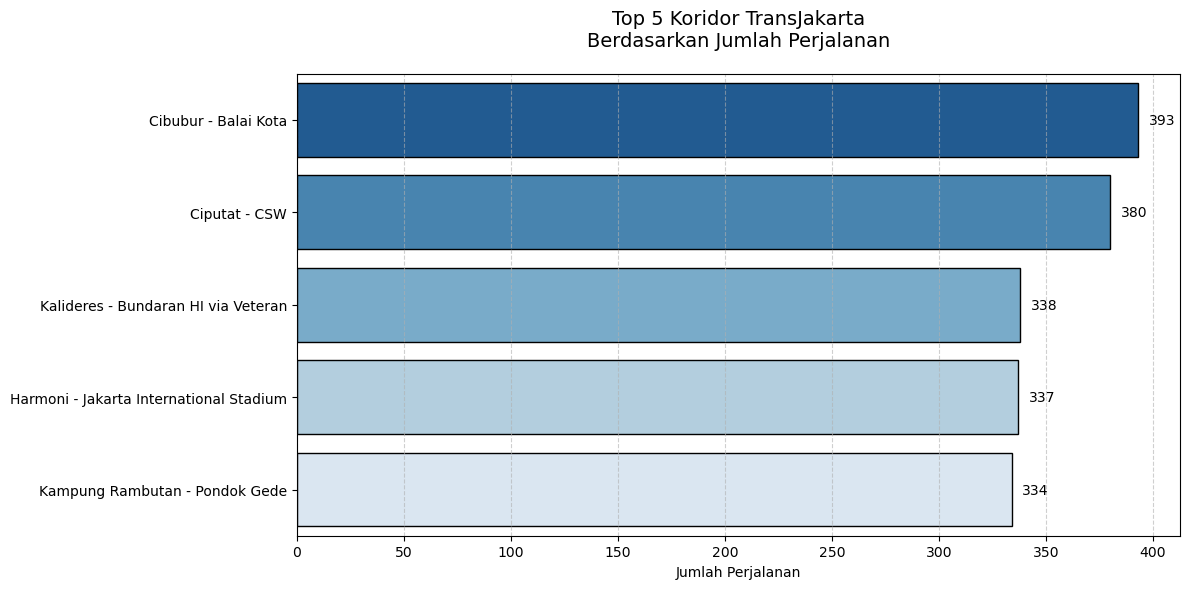

In [67]:
plt.figure(figsize=(12,6))
barplot = sns.barplot(data=top_corridors, 
                     x='Jumlah_Perjalanan', 
                     y='Nama_Koridor',
                     palette='Blues_r',
                     edgecolor='black')

plt.title('Top 5 Koridor TransJakarta\nBerdasarkan Jumlah Perjalanan', fontsize=14, pad=20)
plt.xlabel('Jumlah Perjalanan')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Tambah label data
for i, value in enumerate(top_corridors['Jumlah_Perjalanan']):
    barplot.text(value+5, i, f"{value}", va='center')

plt.tight_layout()
plt.show()

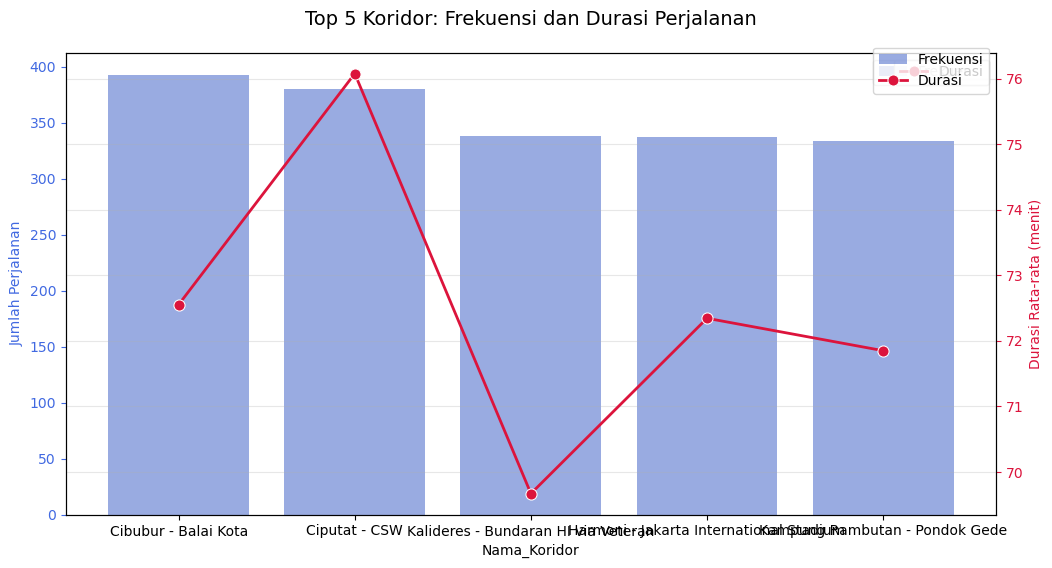

In [68]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot frekuensi (batang)
ax1 = sns.barplot(data=top_corridors, 
                 x='Nama_Koridor', 
                 y='Jumlah_Perjalanan',
                 color='royalblue',
                 alpha=0.6,
                 label='Frekuensi')
ax1.set_ylabel('Jumlah Perjalanan', color='royalblue')
ax1.tick_params(axis='y', colors='royalblue')

# Plot durasi (garis)
ax2 = ax1.twinx()
ax2 = sns.lineplot(data=top_corridors, 
                  x='Nama_Koridor', 
                  y='duration_min',
                  color='crimson',
                  marker='o',
                  markersize=8,
                  linewidth=2,
                  label='Durasi')
ax2.set_ylabel('Durasi Rata-rata (menit)', color='crimson')
ax2.tick_params(axis='y', colors='crimson')

plt.title('Top 5 Koridor: Frekuensi dan Durasi Perjalanan', fontsize=14, pad=20)
plt.xticks(rotation=15)
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9))
plt.grid(axis='y', alpha=0.3)
plt.show()

<Figure size 1400x700 with 0 Axes>

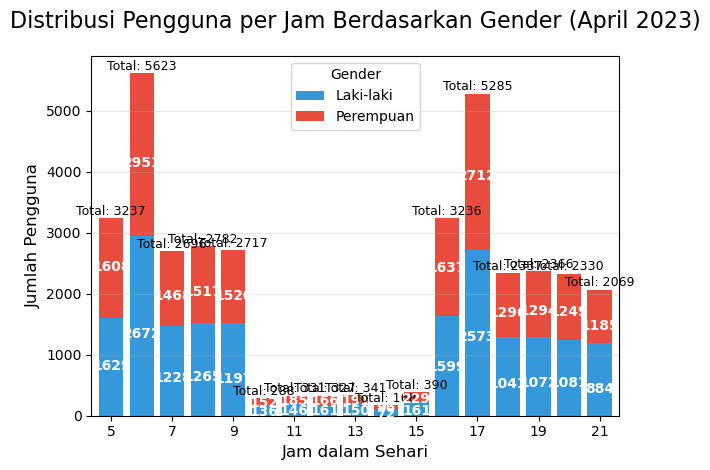

In [71]:

# 1. Ekstrak jam dan filter data
df['hour'] = df['tapInTime'].dt.hour
hourly_gender = df.groupby(['hour', 'payCardSex']).size().unstack()

# 2. Visualisasi Stacked Bar Chart
plt.figure(figsize=(14, 7))
hourly_gender.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'], width=0.8)

plt.title('Distribusi Pengguna per Jam Berdasarkan Gender (April 2023)', fontsize=16, pad=20)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Jumlah Pengguna', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Formatting
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Pastikan jam tampil sebagai integer
plt.legend(title='Gender', labels=['Laki-laki', 'Perempuan'])

# Tambah label nilai
for i, (m, f) in enumerate(zip(hourly_gender['M'], hourly_gender['F'])):
    total = m + f
    if m > 0:
        ax.text(i, m/2, f"{m}", ha='center', va='center', color='white', fontweight='bold')
    if f > 0:
        ax.text(i, m + f/2, f"{f}", ha='center', va='center', color='white', fontweight='bold')
    ax.text(i, total + 5, f"Total: {total}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [ ]:
# df.to_csv('Transjakarta_analyst.csv', index=False)

In [72]:
df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,...,tapOutTime,payAmount,all_tapout_missing,age,duration_min,age_group,day,day_name,hour,date
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,...,2023-04-03 06:00:53,3500.0,False,15,39.150000,11-20,3,Monday,5,2023-04-03
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,...,2023-04-03 06:40:01,3500.0,False,26,57.283333,21-30,3,Monday,5,2023-04-03
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,...,2023-04-03 06:50:55,3500.0,False,31,51.816667,31-40,3,Monday,5,2023-04-03
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,...,2023-04-03 06:28:16,3500.0,False,45,43.416667,41-50,3,Monday,5,2023-04-03
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,...,2023-04-03 06:57:03,3500.0,False,41,39.466667,41-50,3,Monday,6,2023-04-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36518,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,...,2023-04-21 19:55:49,3500.0,False,19,97.200000,11-20,21,Friday,18,2023-04-21
36519,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,...,2023-04-18 22:28:22,3500.0,False,49,35.850000,41-50,18,Tuesday,21,2023-04-18
36520,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,...,2023-04-04 13:27:25,20000.0,False,47,177.633333,41-50,4,Tuesday,10,2023-04-04
36521,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,...,2023-04-15 20:27:50,0.0,False,47,28.400000,41-50,15,Saturday,19,2023-04-15
